### Eco 100 diagrams

## Linear Demand and Supply Diagram

This is a jupyter notebook to generate a simple interactive supply and demand diagram using python and `ipywidgets` (interactive HTML widgets) to provide sliders and animations.

To run this notebook first run the code cells in the [code Section](#Code-Section) below and then return to run the cells below. If you are running this on Microsoft Azure notebook cloud service make sure you choose the kernel to be python 3.5 or above.

---

(200.0, array(200.))

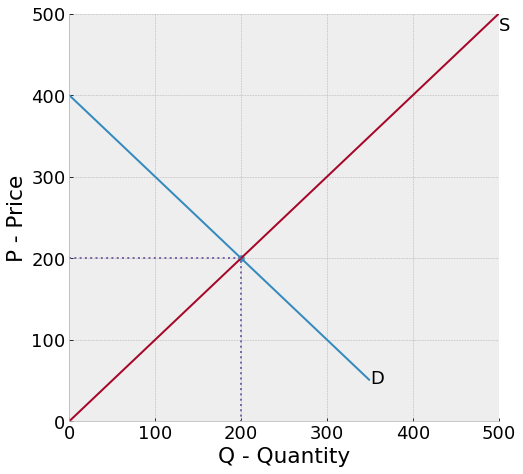

In [10]:
mkt(A=400, b=1, F=0, c=1)

### interactive plot
On the next cell move the sliders in the next cell to shift Supply or Demand in or out

Note: this will not display unless you are running this on a jupyter server

In [11]:
interact(mkt, A=(200,500,10),b=fixed(1),F=(0,300,10),c=fixed(1));

interactive(children=(IntSlider(value=200, description='A', max=500, min=200, step=10), IntSlider(value=0, des…

### Quantitative Restrictions

Pd = 350, Ps = 150, license rent = 200
CS = 11250, PS = 11250, rents = 30000, TS = 52500  DWL = 10000


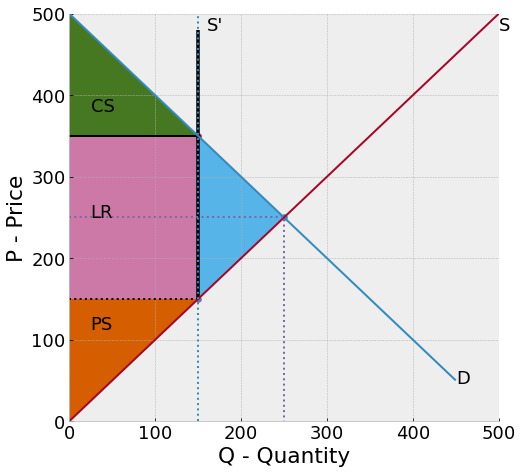

In [12]:
qrplot(150);

In [13]:
interact(qrplot, qr =(0,250,10));

interactive(children=(IntSlider(value=120, description='qr', max=250, step=10), Output()), _dom_classes=('widg…

End

## Code Section
We've put the code down here to keep the presentation uncluttered. Run the cells below first and then return to cells above where these functions are called.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

The following is just styling for the graph

In [6]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 18

Now let's define simple linear (inverse) demand and supply functions:

In [7]:
def PD(Q, A, b):
    return np.array(A - b * Q)

def PS(Q, F, c):
    return np.array(F + c * Q)

In [8]:
def mkt(A=200, b=1, F=0, c=1):
    '''Draw supply and demand diagram and calculate market equilibrium price and quantity'''
    xmax = ymax = 500
    xclip = 400
    Q = np.arange(xmax)
    
    # for aesthetic reasons we clip demand curve line to end above the x-axis by plotting over shorter Q_ 
    d_end = np.round((A-50)/b)
    Q_ = np.arange(0, d_end)
    s_end = (xmax - F)/c    # to keep S label inside box
    
    plt.figure(figsize=(7.7,7.5))
    plt.xlim(0,xmax)
    plt.ylim(0, ymax)
    plt.xlabel('Q - Quantity')
    plt.ylabel('P - Price')
    
    plt.plot(Q_,PD(Q_,A,b))
    plt.text(d_end, PD(d_end, A,b)-4, 'D', fontsize = 18)
    plt.plot(Q,PS(Q,F,c))
    plt.text(s_end, PS(s_end, F,c)-20, 'S', fontsize = 18)
    
    # market equilibrium
    Qe = (A-F)/(c+b)
    Pe = PD(Qe, A, b)
    CS = (1/2)*(A-Pe)*Qe
    plt.scatter(Qe, Pe)
    plt.plot([0, Qe, Qe],[Pe, Pe, 0], ':')
    return Qe, Pe
    

#### Notes: the simple math behind the diagram

A demand curve tells us the quantity $Q$ that will be demanded of a good at any given price. This suggests a relationship of the form $Q(P)$, i.e. $Q$ as a function of $P$. 

However, by historical convention economists have almost always drawn demand curves with quantity $Q$ on the horizontal axis and price $P$ on the vertical axis. For some this might suggest we are plotting a function of the form $P(Q)$.  This is an 'inverse' demand function (the maximum price at which quantity Q will be demanded).       

In the diagram we use a linear (inverse) **demand curve** of the form:

$$P^D(Q) = A + b \cdot Q$$

this of course corresponds to a Demand curve of the form $Q^D(P) = \frac{A}{b} - \frac{1}{b}P$

The (inverse) **supply curve** curve is of the form:

$$P^S(Q) = F + c \cdot Q$$

As will be seen later in the course the market supply curve is a marginal cost curve.

The market equilibrium price $P^e$ can be found where supply meets demand.  

$$P^S(Q) = P^e = P^D(Q)$$

With the linear demand and supply system above we can easily solve for the market equilibrium quantity $Q^e$

$$A+ b \cdot Q^e  = F + c \cdot Q^e$$

which leads to:

$$Q^e = \frac{A-F}{c+b}$$

And the market equilibrium price $P^e$ is then easuily found from either $P^D(Q^e)$ or $P^S(Q^e)$ 

## Quantitative Restriction plot

In [9]:
def qrplot(qr):
    A, b, F, c = 500, 1, 0, 1
    qe, pe = mkt(A=500, b=1, F=0, c=1)
    pd = PD(qr, A, b)
    ps = PS(qr, F, c)
    plt.scatter(qr, pd)
    plt.scatter(qr, ps)
    plt.axvline(qr, linestyle=':')
    plt.vlines(qr, ymin= ps, ymax=480, linewidth =3.5)
    plt.text(qr+10,480, "S\'")
    plt.hlines(pd,xmin=0, xmax=qr)
    plt.hlines(ps,xmin=0, xmax=qr, linestyle=':')
    csurplus = (1/2) * qr*(A-pd)
    psurplus = (1/2) * qr*(ps-F)
    rents = qr *(pd-ps)
    tsurplus = csurplus + psurplus + rents
    dwl = (1/2)*(qe-qr)*(pd-ps)
    plt.text(qr/6,pd+(A-pd)/5, 'CS')
    plt.text(qr/6,ps-(ps-F)/4, 'PS')
    if qr<80:
        plt.text(qr/6,(ps+pd)/2, 'Rents', rotation=90)
    elif qr == qe:
        pass
    else:
        plt.text(qr/6,(ps+pd)/2, 'LR')
    
    print( f'Pd = {pd:2.0f}, Ps = {ps:2.0f}, license rent = {pd-ps:2.0f}')
    print(f'CS = {csurplus:2.0f}, PS = {psurplus:2.0f}, rents = {rents:2.0f}, TS = {tsurplus:2.0f}  DWL = {dwl:2.0f}')
    Q = np.arange(qr)
    Q2 = np.arange(qr, qe)
    plt.fill_between(Q, PD(Q,A,b), pd)
    plt.fill_between(Q, PS(Q,F,c), ps)
    plt.fill_between(Q, pd, ps)
    plt.fill_between(Q2, PD(Q2,A,b), PS(Q2,F,c));
    
    